# ConvAge3  
Bigger SegNet architecture than ConvAge2, designed to respect the make the most out of MX150 GPU. 

In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from data_utils import FaceData
from data_utils_background import FaceDataCropped
import time
import os

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.ion()   # interactive mode

In [2]:
train_data = FaceDataCropped(image_paths_file='LAG_background/train/train.txt')
val_data = FaceData(image_paths_file='LAG/val/val.txt')
test_data = FaceData(image_paths_file='LAG/train/train.txt')

Train size: 1489
Validation size: 260
Img size:  torch.Size([3, 200, 200])
Segmentation size:  torch.Size([200, 200])


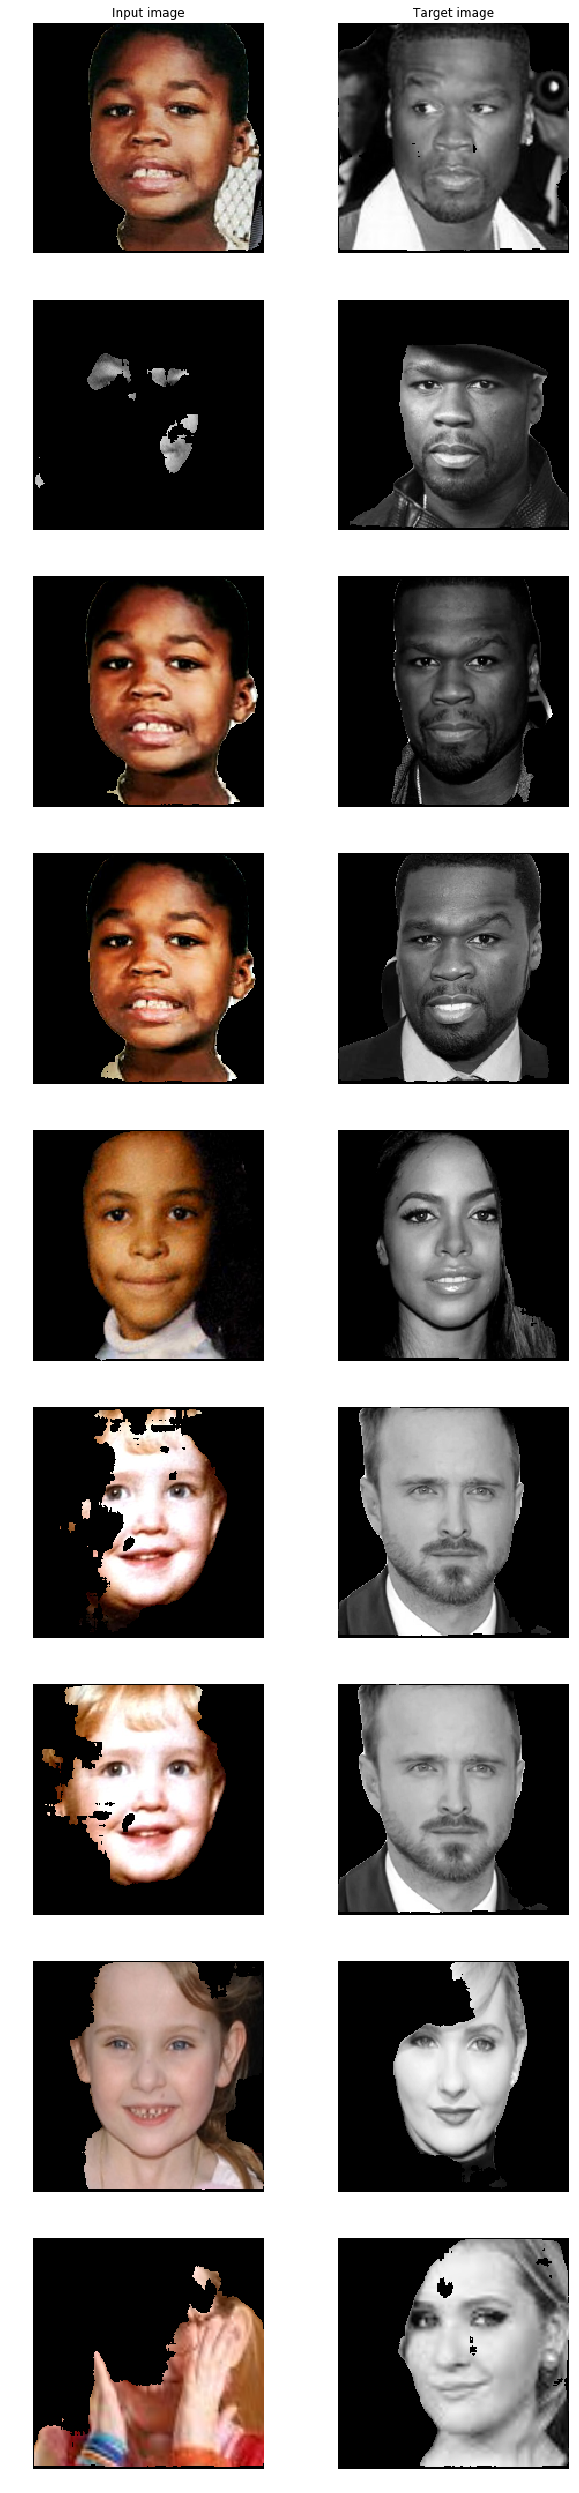

In [9]:
print("Train size: %i" % len(train_data))
print("Validation size: %i" % len(val_data))
print("Img size: ", train_data[0][0].size())
print("Segmentation size: ", train_data[0][1].size())

num_example_imgs = 9
plt.figure(figsize=(10, 5 * num_example_imgs))
for i, (img, target) in enumerate(train_data[:num_example_imgs]):
    # img
    plt.subplot(num_example_imgs, 2, i * 2 + 1)
    plt.imshow(img.numpy().transpose(1,2,0))
    plt.axis('off')
    if i == 0:
        plt.title("Input image")
    
    # target
    plt.subplot(num_example_imgs, 2, i * 2 + 2)
    targetsc = target.numpy() / 255
    plt.imshow(targetsc.reshape(200, 200), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Target image")
plt.show()

In [ ]:
from classifiers.convage_nn_3 import ConvAgeNN
from solver import Solver
import torch.nn.functional as F
import torchvision.models as models

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=1,
                                           shuffle=True,
                                           num_workers=1)
val_loader = torch.utils.data.DataLoader(val_data,
                                         batch_size=1,
                                         shuffle=False,
                                         num_workers=1)
model = torch.load('models/convage_nn_3.model')
print(len(list(model.parameters())))

for param in list(model.parameters())[:4]:
    param.requires_grad = False    

solver = Solver(optim_args={"lr": 1e-3,
                            "eps": 1e-8
                            },
                loss_func = torch.nn.CrossEntropyLoss(ignore_index = -1))
solver.train(model, train_loader, val_loader, log_nth=1, num_epochs=5)

72
START TRAIN.
[Iteration 1/7445] TRAIN loss: 5.420
[Iteration 2/7445] TRAIN loss: 4.858
[Iteration 3/7445] TRAIN loss: 5.165
[Iteration 4/7445] TRAIN loss: 5.348
[Iteration 5/7445] TRAIN loss: 4.929
[Iteration 6/7445] TRAIN loss: 5.431
[Iteration 7/7445] TRAIN loss: 4.656
[Iteration 8/7445] TRAIN loss: 4.863
[Iteration 9/7445] TRAIN loss: 5.138
[Iteration 10/7445] TRAIN loss: 5.319
[Iteration 11/7445] TRAIN loss: 5.353
[Iteration 12/7445] TRAIN loss: 5.474
[Iteration 13/7445] TRAIN loss: 5.279
[Iteration 14/7445] TRAIN loss: 5.222
[Iteration 15/7445] TRAIN loss: 4.959
[Iteration 16/7445] TRAIN loss: 5.511
[Iteration 17/7445] TRAIN loss: 5.461
[Iteration 18/7445] TRAIN loss: 5.297
[Iteration 19/7445] TRAIN loss: 5.337
[Iteration 20/7445] TRAIN loss: 4.910
[Iteration 21/7445] TRAIN loss: 5.235
[Iteration 22/7445] TRAIN loss: 5.591
[Iteration 23/7445] TRAIN loss: 4.618
[Iteration 24/7445] TRAIN loss: 5.346
[Iteration 25/7445] TRAIN loss: 5.022
[Iteration 26/7445] TRAIN loss: 5.472
[Iter

[Iteration 214/7445] TRAIN loss: 5.101
[Iteration 215/7445] TRAIN loss: 4.871
[Iteration 216/7445] TRAIN loss: 4.859
[Iteration 217/7445] TRAIN loss: 4.629
[Iteration 218/7445] TRAIN loss: 5.423
[Iteration 219/7445] TRAIN loss: 5.451
[Iteration 220/7445] TRAIN loss: 4.782
[Iteration 221/7445] TRAIN loss: 5.453
[Iteration 222/7445] TRAIN loss: 5.751
[Iteration 223/7445] TRAIN loss: 5.207
[Iteration 224/7445] TRAIN loss: 4.976
[Iteration 225/7445] TRAIN loss: 5.022
[Iteration 226/7445] TRAIN loss: 5.239
[Iteration 227/7445] TRAIN loss: 4.985
[Iteration 228/7445] TRAIN loss: 5.540
[Iteration 229/7445] TRAIN loss: 5.300
[Iteration 230/7445] TRAIN loss: 5.307
[Iteration 231/7445] TRAIN loss: 5.554
[Iteration 232/7445] TRAIN loss: 5.248
[Iteration 233/7445] TRAIN loss: 5.382
[Iteration 234/7445] TRAIN loss: 5.429
[Iteration 235/7445] TRAIN loss: 5.024
[Iteration 236/7445] TRAIN loss: 4.980
[Iteration 237/7445] TRAIN loss: 5.133
[Iteration 238/7445] TRAIN loss: 5.382
[Iteration 239/7445] TRAI

[Iteration 425/7445] TRAIN loss: 5.349
[Iteration 426/7445] TRAIN loss: 5.260
[Iteration 427/7445] TRAIN loss: 5.530
[Iteration 428/7445] TRAIN loss: 5.494
[Iteration 429/7445] TRAIN loss: 4.454
[Iteration 430/7445] TRAIN loss: 5.562
[Iteration 431/7445] TRAIN loss: 5.039
[Iteration 432/7445] TRAIN loss: 5.469
[Iteration 433/7445] TRAIN loss: 5.172
[Iteration 434/7445] TRAIN loss: 5.337
[Iteration 435/7445] TRAIN loss: 5.463
[Iteration 436/7445] TRAIN loss: 5.375
[Iteration 437/7445] TRAIN loss: 5.256
[Iteration 438/7445] TRAIN loss: 5.664
[Iteration 439/7445] TRAIN loss: 5.740
[Iteration 440/7445] TRAIN loss: 5.112
[Iteration 441/7445] TRAIN loss: 5.436
[Iteration 442/7445] TRAIN loss: 5.308
[Iteration 443/7445] TRAIN loss: 5.530
[Iteration 444/7445] TRAIN loss: 5.462
[Iteration 445/7445] TRAIN loss: 5.393
[Iteration 446/7445] TRAIN loss: 5.408
[Iteration 447/7445] TRAIN loss: 5.240
[Iteration 448/7445] TRAIN loss: 5.323
[Iteration 449/7445] TRAIN loss: 4.690
[Iteration 450/7445] TRAI

[Iteration 636/7445] TRAIN loss: 5.623
[Iteration 637/7445] TRAIN loss: 5.372
[Iteration 638/7445] TRAIN loss: 5.254
[Iteration 639/7445] TRAIN loss: 5.349
[Iteration 640/7445] TRAIN loss: 5.319
[Iteration 641/7445] TRAIN loss: 5.426
[Iteration 642/7445] TRAIN loss: 5.541
[Iteration 643/7445] TRAIN loss: 5.275
[Iteration 644/7445] TRAIN loss: 5.048
[Iteration 645/7445] TRAIN loss: 5.506
[Iteration 646/7445] TRAIN loss: 5.579
[Iteration 647/7445] TRAIN loss: 5.191
[Iteration 648/7445] TRAIN loss: 5.484
[Iteration 649/7445] TRAIN loss: 5.117
[Iteration 650/7445] TRAIN loss: 5.430
[Iteration 651/7445] TRAIN loss: 4.510
[Iteration 652/7445] TRAIN loss: 5.201
[Iteration 653/7445] TRAIN loss: 5.160
[Iteration 654/7445] TRAIN loss: 5.545
[Iteration 655/7445] TRAIN loss: 5.336
[Iteration 656/7445] TRAIN loss: 5.454
[Iteration 657/7445] TRAIN loss: 5.872
[Iteration 658/7445] TRAIN loss: 4.796
[Iteration 659/7445] TRAIN loss: 4.709
[Iteration 660/7445] TRAIN loss: 5.441
[Iteration 661/7445] TRAI

[Iteration 847/7445] TRAIN loss: 5.396
[Iteration 848/7445] TRAIN loss: 5.346
[Iteration 849/7445] TRAIN loss: 5.389
[Iteration 850/7445] TRAIN loss: 5.493
[Iteration 851/7445] TRAIN loss: 5.647
[Iteration 852/7445] TRAIN loss: 4.857
[Iteration 853/7445] TRAIN loss: 5.462
[Iteration 854/7445] TRAIN loss: 5.341
[Iteration 855/7445] TRAIN loss: 5.305
[Iteration 856/7445] TRAIN loss: 5.294
[Iteration 857/7445] TRAIN loss: 5.827
[Iteration 858/7445] TRAIN loss: 5.777
[Iteration 859/7445] TRAIN loss: 5.270
[Iteration 860/7445] TRAIN loss: 5.219
[Iteration 861/7445] TRAIN loss: 5.096
[Iteration 862/7445] TRAIN loss: 4.947
[Iteration 863/7445] TRAIN loss: 5.481
[Iteration 864/7445] TRAIN loss: 5.382
[Iteration 865/7445] TRAIN loss: 5.213
[Iteration 866/7445] TRAIN loss: 5.162
[Iteration 867/7445] TRAIN loss: 5.260
[Iteration 868/7445] TRAIN loss: 5.268
[Iteration 869/7445] TRAIN loss: 5.346
[Iteration 870/7445] TRAIN loss: 4.950
[Iteration 871/7445] TRAIN loss: 5.203
[Iteration 872/7445] TRAI

[Iteration 1056/7445] TRAIN loss: 5.060
[Iteration 1057/7445] TRAIN loss: 4.647
[Iteration 1058/7445] TRAIN loss: 4.119
[Iteration 1059/7445] TRAIN loss: 5.383
[Iteration 1060/7445] TRAIN loss: 5.397
[Iteration 1061/7445] TRAIN loss: 5.647
[Iteration 1062/7445] TRAIN loss: 5.021
[Iteration 1063/7445] TRAIN loss: 5.753
[Iteration 1064/7445] TRAIN loss: 5.522
[Iteration 1065/7445] TRAIN loss: 5.245
[Iteration 1066/7445] TRAIN loss: 5.057
[Iteration 1067/7445] TRAIN loss: 5.386
[Iteration 1068/7445] TRAIN loss: 5.327
[Iteration 1069/7445] TRAIN loss: 5.485
[Iteration 1070/7445] TRAIN loss: 5.206
[Iteration 1071/7445] TRAIN loss: 5.305
[Iteration 1072/7445] TRAIN loss: 5.396
[Iteration 1073/7445] TRAIN loss: 5.446
[Iteration 1074/7445] TRAIN loss: 5.406
[Iteration 1075/7445] TRAIN loss: 5.289
[Iteration 1076/7445] TRAIN loss: 5.458
[Iteration 1077/7445] TRAIN loss: 5.491
[Iteration 1078/7445] TRAIN loss: 5.169
[Iteration 1079/7445] TRAIN loss: 5.493
[Iteration 1080/7445] TRAIN loss: 5.365


[Iteration 1261/7445] TRAIN loss: 4.898
[Iteration 1262/7445] TRAIN loss: 5.008
[Iteration 1263/7445] TRAIN loss: 5.435
[Iteration 1264/7445] TRAIN loss: 4.969
[Iteration 1265/7445] TRAIN loss: 5.565
[Iteration 1266/7445] TRAIN loss: 5.357
[Iteration 1267/7445] TRAIN loss: 5.464
[Iteration 1268/7445] TRAIN loss: 5.598
[Iteration 1269/7445] TRAIN loss: 5.659
[Iteration 1270/7445] TRAIN loss: 4.896
[Iteration 1271/7445] TRAIN loss: 4.942
[Iteration 1272/7445] TRAIN loss: 5.462
[Iteration 1273/7445] TRAIN loss: 5.183
[Iteration 1274/7445] TRAIN loss: 5.347
[Iteration 1275/7445] TRAIN loss: 5.526
[Iteration 1276/7445] TRAIN loss: 4.777
[Iteration 1277/7445] TRAIN loss: 5.433
[Iteration 1278/7445] TRAIN loss: 5.457
[Iteration 1279/7445] TRAIN loss: 5.304
[Iteration 1280/7445] TRAIN loss: 5.118
[Iteration 1281/7445] TRAIN loss: 5.271
[Iteration 1282/7445] TRAIN loss: 5.715
[Iteration 1283/7445] TRAIN loss: 5.315
[Iteration 1284/7445] TRAIN loss: 5.225
[Iteration 1285/7445] TRAIN loss: 4.484


[Iteration 1466/7445] TRAIN loss: 5.419
[Iteration 1467/7445] TRAIN loss: 5.702
[Iteration 1468/7445] TRAIN loss: 5.420
[Iteration 1469/7445] TRAIN loss: 5.135
[Iteration 1470/7445] TRAIN loss: 4.797
[Iteration 1471/7445] TRAIN loss: 5.354
[Iteration 1472/7445] TRAIN loss: 5.314
[Iteration 1473/7445] TRAIN loss: 5.313
[Iteration 1474/7445] TRAIN loss: 5.570
[Iteration 1475/7445] TRAIN loss: 5.411
[Iteration 1476/7445] TRAIN loss: 5.396
[Iteration 1477/7445] TRAIN loss: 5.302
[Iteration 1478/7445] TRAIN loss: 5.302
[Iteration 1479/7445] TRAIN loss: 5.294
[Iteration 1480/7445] TRAIN loss: 5.437
[Iteration 1481/7445] TRAIN loss: 4.997
[Iteration 1482/7445] TRAIN loss: 5.427
[Iteration 1483/7445] TRAIN loss: 5.296
[Iteration 1484/7445] TRAIN loss: 5.525
[Iteration 1485/7445] TRAIN loss: 5.221
[Iteration 1486/7445] TRAIN loss: 5.246
[Iteration 1487/7445] TRAIN loss: 5.325
[Iteration 1488/7445] TRAIN loss: 5.309
[Iteration 1489/7445] TRAIN loss: 5.368
[Epoch 1/5] TRAIN acc/loss: 0.003/5.368


[Iteration 1670/7445] TRAIN loss: 5.288
[Iteration 1671/7445] TRAIN loss: 5.142
[Iteration 1672/7445] TRAIN loss: 5.372
[Iteration 1673/7445] TRAIN loss: 5.641
[Iteration 1674/7445] TRAIN loss: 4.923
[Iteration 1675/7445] TRAIN loss: 5.386
[Iteration 1676/7445] TRAIN loss: 5.289
[Iteration 1677/7445] TRAIN loss: 5.320
[Iteration 1678/7445] TRAIN loss: 4.830
[Iteration 1679/7445] TRAIN loss: 5.494
[Iteration 1680/7445] TRAIN loss: 5.323
[Iteration 1681/7445] TRAIN loss: 4.704
[Iteration 1682/7445] TRAIN loss: 4.493
[Iteration 1683/7445] TRAIN loss: 5.526
[Iteration 1684/7445] TRAIN loss: 5.186
[Iteration 1685/7445] TRAIN loss: 5.569
[Iteration 1686/7445] TRAIN loss: 5.712
[Iteration 1687/7445] TRAIN loss: 5.389
[Iteration 1688/7445] TRAIN loss: 5.124
[Iteration 1689/7445] TRAIN loss: 5.587
[Iteration 1690/7445] TRAIN loss: 5.053
[Iteration 1691/7445] TRAIN loss: 4.959
[Iteration 1692/7445] TRAIN loss: 5.637
[Iteration 1693/7445] TRAIN loss: 4.892
[Iteration 1694/7445] TRAIN loss: 5.300


[Iteration 1875/7445] TRAIN loss: 4.919
[Iteration 1876/7445] TRAIN loss: 5.380
[Iteration 1877/7445] TRAIN loss: 5.119
[Iteration 1878/7445] TRAIN loss: 5.417
[Iteration 1879/7445] TRAIN loss: 5.403
[Iteration 1880/7445] TRAIN loss: 5.107
[Iteration 1881/7445] TRAIN loss: 5.145
[Iteration 1882/7445] TRAIN loss: 5.253
[Iteration 1883/7445] TRAIN loss: 4.738
[Iteration 1884/7445] TRAIN loss: 5.582
[Iteration 1885/7445] TRAIN loss: 5.443
[Iteration 1886/7445] TRAIN loss: 5.240
[Iteration 1887/7445] TRAIN loss: 5.439
[Iteration 1888/7445] TRAIN loss: 5.398
[Iteration 1889/7445] TRAIN loss: 5.034
[Iteration 1890/7445] TRAIN loss: 5.166
[Iteration 1891/7445] TRAIN loss: 5.544
[Iteration 1892/7445] TRAIN loss: 5.090
[Iteration 1893/7445] TRAIN loss: 5.234
[Iteration 1894/7445] TRAIN loss: 5.540


In [3]:
model = torch.load('models/convage_nn_background_380epochs.model')

/home/carlodedonno/anaconda3/lib/python3.6/site-packages/torch/serialization.py:316: SourceChangeWarning: source code of class 'classifiers.convage_nn_3.ConvAgeNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [4]:
model.cpu()

ConvAgeNN(
  (down1): VGGDown2(
    (conv1): conv2DRelu(
      (cb_unit): Sequential(
        (0): Conv2d (3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace)
      )
    )
    (conv2): conv2DRelu(
      (cb_unit): Sequential(
        (0): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace)
      )
    )
    (maxpool_with_argmax): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (down2): VGGDown2(
    (conv1): conv2DRelu(
      (cb_unit): Sequential(
        (0): Conv2d (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace)
      )
    )
    (conv2): conv2DRelu(
      (cb_unit): Sequential(
        (0): Conv2d (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace)
      )
    )
    (maxpool_with_argmax): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (down3): segnetDown2(
    (conv1): conv2DBatchNormRelu(
 

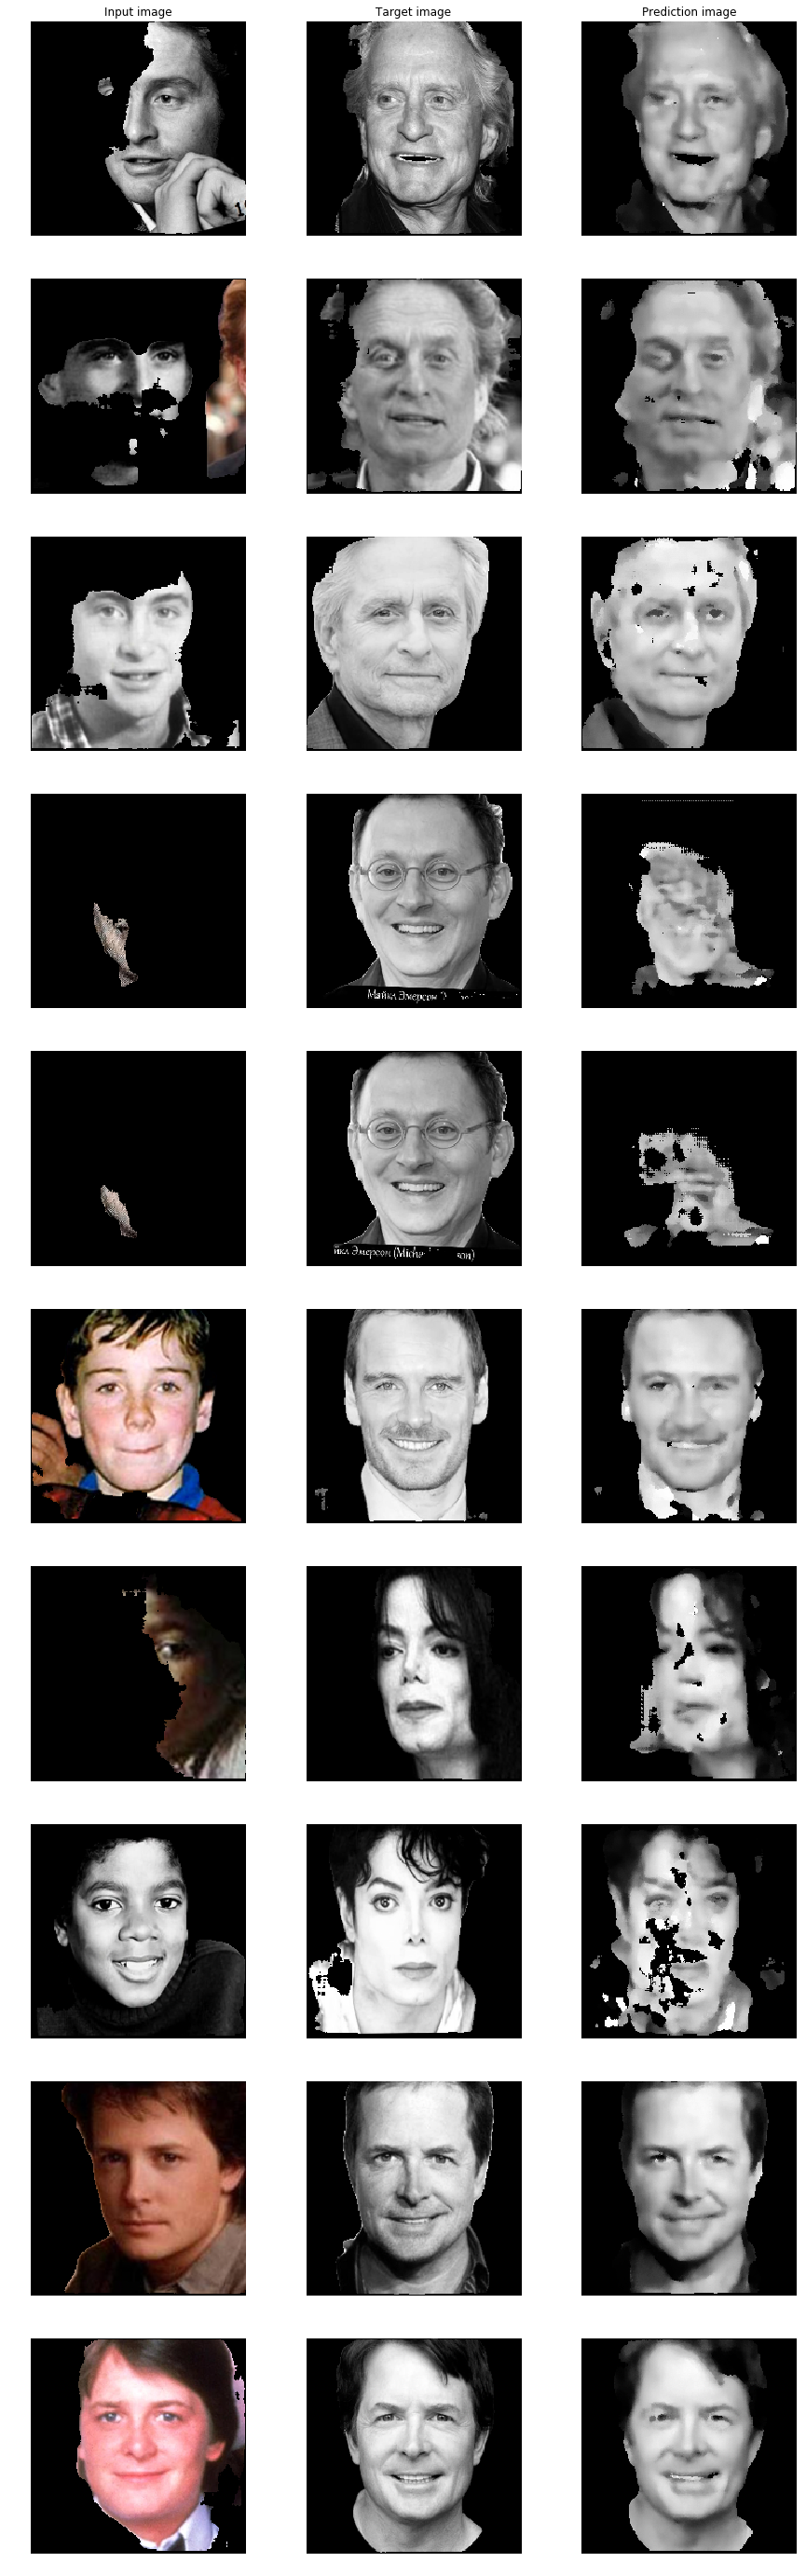

In [9]:
num_example_imgs = 10
plt.figure(figsize=(15, 5 * num_example_imgs))
for i, (img, target) in enumerate(train_data[1220:1220+num_example_imgs]):
    inputs = img.unsqueeze(0)
    inputs = Variable(inputs)
    if model.is_cuda:
        inputs = inputs.cuda()
    
    outputs = model.forward(inputs)
    _, preds = torch.max(outputs, 1)
    pred = preds[0].data.cpu()
    
    img, target, pred = img.numpy(), target.numpy(), pred.numpy()
    
    # img
    plt.subplot(num_example_imgs, 3, i * 3 + 1)
    plt.axis('off')
    plt.imshow(img.transpose(1,2,0))
    if i == 0:
        plt.title("Input image")
    
    # target
    plt.subplot(num_example_imgs, 3, i * 3 + 2)
    plt.axis('off')
    target /= 255
    plt.imshow(target.reshape(200,200), cmap='gray')
    if i == 0:
        plt.title("Target image")

    # pred
    plt.subplot(num_example_imgs, 3, i * 3 + 3)
    plt.axis('off')
    plt.imshow(pred.reshape(200,200), cmap='gray')
    if i == 0:
        plt.title("Prediction image")
plt.show()